<a href="https://colab.research.google.com/github/igrodfer/DeepLearningLab/blob/main/cifar10_8600.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from __future__ import print_function
%load_ext autoreload
%autoreload 2
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import np_utils

from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
batch_size = 100
num_classes = 10
epochs = 75

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
## DEF A BLOCK CONV + BN + GN + MAXPOOL
def CBGN(model,filters,ishape=0):
  if (ishape!=0):
    model.add(Conv2D(filters, (3, 3), padding='same',
                 input_shape=ishape))
  else:
    model.add(Conv2D(filters, (3, 3), padding='same'))
  
  model.add(BN())
  model.add(GN(0.3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  
  return model

In [19]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2)


In [20]:
## DEF NN TOPOLOGY  
model = Sequential()

model=CBGN(model,32,x_train.shape[1:])
model=CBGN(model,64)
model=CBGN(model,128)
model=CBGN(model,256)
model=CBGN(model,512)

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [21]:
## OPTIM AND COMPILE
opt = Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [22]:
history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)

## TEST
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/75
500/500 [==============================] - 33s 64ms/step - loss: 1.6333 - accuracy: 0.4075 - val_loss: 1.5602 - val_accuracy: 0.4443
Epoch 2/75
500/500 [==============================] - 31s 61ms/step - loss: 1.3163 - accuracy: 0.5263 - val_loss: 1.3813 - val_accuracy: 0.5254
Epoch 3/75
500/500 [==============================] - 31s 61ms/step - loss: 1.1555 - accuracy: 0.5860 - val_loss: 1.6950 - val_accuracy: 0.5160
Epoch 4/75
500/500 [==============================] - 30s 60ms/step - loss: 1.0659 - accuracy: 0.6225 - val_loss: 1.0804 - val_accuracy: 0.6312
Epoch 5/75
500/500 [==============================] - 31s 62ms/step - loss: 0.9857 - accuracy: 0.6529 - val_loss: 1.0378 - val_accuracy: 0.6548
Epoch 6/75
500/500 [==============================] - 30s 61ms/step - loss: 0.9370 - accuracy: 0.6695 - val_loss: 0.9258 - val_accuracy: 0.6833
Epoch 7/75
500/500 [==============================] - 31s 61ms/step - loss: 0.8952 - accuracy: 0.6880 - val_loss: 1.1736 - val_accuracy:

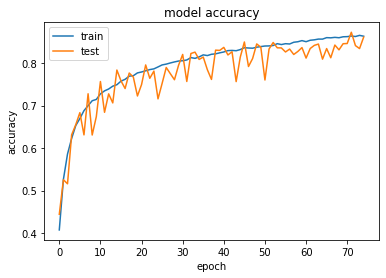

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()